<a href="https://colab.research.google.com/github/raj-hero/UGProject/blob/main/lstm_ug_btp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('load.csv')

In [3]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
df

,temp_2M,humidity_2M,precipitation_2M,wind_speed_2M,holiday,net_demand
Datetime,,,,,,
2015-01-03 01:00:00,25.865259,0.018576,0.016174,21.850546,0,970.3450
2015-01-03 02:00:00,25.899255,0.018653,0.016418,22.166944,0,912.1755
2015-01-03 03:00:00,25.937280,0.018768,0.015480,22.454911,0,900.2688
2015-01-03 04:00:00,25.957544,0.018890,0.016273,22.110481,0,889.9538
2015-01-03 05:00:00,25.973840,0.018981,0.017281,21.186089,0,893.6865
...,...,...,...,...,...,...
2020-06-26 20:00:00,27.246545,0.020303,0.055511,9.289304,0,1128.5592
2020-06-26 21:00:00,27.099573,0.020395,0.053848,9.837504,0,1112.7488
2020-06-26 22:00:00,26.971155,0.020448,0.057251,10.262464,0,1081.5680


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df['net_demand']=scaler.fit_transform(df)

In [5]:
# df = pd.read_csv(csv_path)
df
# time=df['Time']

,temp_2M,humidity_2M,precipitation_2M,wind_speed_2M,holiday,net_demand
Datetime,,,,,,
2015-01-03 01:00:00,25.865259,0.018576,0.016174,21.850546,0,0.240921
2015-01-03 02:00:00,25.899255,0.018653,0.016418,22.166944,0,0.243734
2015-01-03 03:00:00,25.937280,0.018768,0.015480,22.454911,0,0.246880
2015-01-03 04:00:00,25.957544,0.018890,0.016273,22.110481,0,0.248557
2015-01-03 05:00:00,25.973840,0.018981,0.017281,21.186089,0,0.249905
...,...,...,...,...,...,...
2020-06-26 20:00:00,27.246545,0.020303,0.055511,9.289304,0,0.355208
2020-06-26 21:00:00,27.099573,0.020395,0.053848,9.837504,0,0.343048
2020-06-26 22:00:00,26.971155,0.020448,0.057251,10.262464,0,0.332423


<Axes: xlabel='Datetime'>

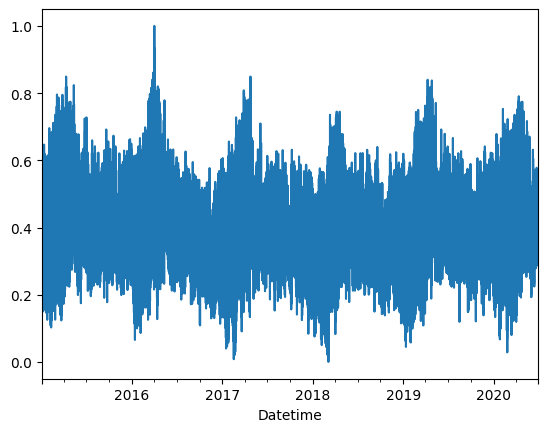

In [6]:
temp = df['net_demand']
temp.plot()

In [7]:
temp

Datetime
2015-01-03 01:00:00    0.240921
2015-01-03 02:00:00    0.243734
2015-01-03 03:00:00    0.246880
2015-01-03 04:00:00    0.248557
2015-01-03 05:00:00    0.249905
                         ...   
2020-06-26 20:00:00    0.355208
2020-06-26 21:00:00    0.343048
2020-06-26 22:00:00    0.332423
2020-06-26 23:00:00    0.323845
2020-06-27 00:00:00    0.314152
Name: net_demand, Length: 48048, dtype: float64

In [8]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((48043, 5, 1), (48043,))

In [10]:
X_train1, y_train1 = X1[:25000], y1[:25000]
X_val1, y_val1 = X1[25000:30000], y1[25000:30000]
X_test1, y_test1 = X1[30000:], y1[30000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((25000, 5, 1), (25000,), (5000, 5, 1), (5000,), (18043, 5, 1), (18043,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
778/782 [============================>.] - ETA: 0s - loss: 0.0554 - root_mean_squared_error: 0.2354

782/782 [==============================] - 14s 14ms/step - loss: 0.0552 - root_mean_squared_error: 0.2350 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1181
Epoch 2/20
779/782 [============================>.] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.1057

782/782 [==============================] - 10s 12ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 3/20
776/782 [============================>.] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.1012

782/782 [==============================] - 10s 13ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 4/20
779/782 [============================>.] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.0930

782/782 [==============================] - 9s 11ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908
Epoch 5/20
779/782 [============================>.] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0604

782/782 [==============================] - 11s 13ms/step - loss: 0.0036 - root_mean_squared_error: 0.0603 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 6/20
778/782 [============================>.] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0377

782/782 [==============================] - 10s 13ms/step - loss: 0.0014 - root_mean_squared_error: 0.0376 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0418
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0427
Epoch 8/20
782/782 [==============================] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0348

782/782 [==============================] - 10s 13ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0397
Epoch 9/20
777/782 [============================>.] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0334

782/782 [==============================] - 10s 12ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0388
Epoch 10/20
779/782 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0317

782/782 [==============================] - 10s 13ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 11/20
775/782 [============================>.] - ETA: 0s - loss: 8.9631e-04 - root_mean_squared_error: 0.0299

782/782 [==============================] - 10s 12ms/step - loss: 8.9550e-04 - root_mean_squared_error: 0.0299 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 12/20
776/782 [============================>.] - ETA: 0s - loss: 7.7491e-04 - root_mean_squared_error: 0.0278

782/782 [==============================] - 10s 12ms/step - loss: 7.7435e-04 - root_mean_squared_error: 0.0278 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 13/20
779/782 [============================>.] - ETA: 0s - loss: 6.6361e-04 - root_mean_squared_error: 0.0258

782/782 [==============================] - 10s 13ms/step - loss: 6.6377e-04 - root_mean_squared_error: 0.0258 - val_loss: 7.6663e-04 - val_root_mean_squared_error: 0.0277
Epoch 14/20
779/782 [============================>.] - ETA: 0s - loss: 5.7118e-04 - root_mean_squared_error: 0.0239

782/782 [==============================] - 9s 12ms/step - loss: 5.7091e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.4998e-04 - val_root_mean_squared_error: 0.0255
Epoch 15/20
782/782 [==============================] - ETA: 0s - loss: 4.8818e-04 - root_mean_squared_error: 0.0221

782/782 [==============================] - 10s 13ms/step - loss: 4.8818e-04 - root_mean_squared_error: 0.0221 - val_loss: 6.0586e-04 - val_root_mean_squared_error: 0.0246
Epoch 16/20
782/782 [==============================] - 5s 6ms/step - loss: 4.2409e-04 - root_mean_squared_error: 0.0206 - val_loss: 6.3057e-04 - val_root_mean_squared_error: 0.0251
Epoch 17/20
781/782 [============================>.] - ETA: 0s - loss: 3.7892e-04 - root_mean_squared_error: 0.0195

782/782 [==============================] - 10s 12ms/step - loss: 3.7894e-04 - root_mean_squared_error: 0.0195 - val_loss: 4.8626e-04 - val_root_mean_squared_error: 0.0221
Epoch 18/20
778/782 [============================>.] - ETA: 0s - loss: 3.4078e-04 - root_mean_squared_error: 0.0185

782/782 [==============================] - 10s 13ms/step - loss: 3.4116e-04 - root_mean_squared_error: 0.0185 - val_loss: 4.0757e-04 - val_root_mean_squared_error: 0.0202
Epoch 19/20
776/782 [============================>.] - ETA: 0s - loss: 3.1348e-04 - root_mean_squared_error: 0.0177

782/782 [==============================] - 9s 11ms/step - loss: 3.1367e-04 - root_mean_squared_error: 0.0177 - val_loss: 3.9488e-04 - val_root_mean_squared_error: 0.0199
Epoch 20/20
781/782 [============================>.] - ETA: 0s - loss: 2.9482e-04 - root_mean_squared_error: 0.0172

782/782 [==============================] - 11s 14ms/step - loss: 2.9480e-04 - root_mean_squared_error: 0.0172 - val_loss: 3.9462e-04 - val_root_mean_squared_error: 0.0199


In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [15]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

782/782 [==============================] - 2s 2ms/step


,Train Predictions,Actuals
0,0.266451,0.254895
1,0.272677,0.309283
2,0.350348,0.390581
3,0.458838,0.480464
4,0.561457,0.563721
...,...,...
24995,0.362871,0.350459
24996,0.330787,0.314399
24997,0.292409,0.295287
24998,0.282079,0.280741


In [16]:
df_train=df.iloc[:25000]
df_val=df.iloc[25000:30000]
df_test=df.iloc[30005:]


In [17]:
train_results.set_index(df_train.index,inplace=True)
train_results

,Train Predictions,Actuals
Datetime,,
2015-01-03 01:00:00,0.266451,0.254895
2015-01-03 02:00:00,0.272677,0.309283
2015-01-03 03:00:00,0.350348,0.390581
2015-01-03 04:00:00,0.458838,0.480464
2015-01-03 05:00:00,0.561457,0.563721
...,...,...
2017-11-09 12:00:00,0.362871,0.350459
2017-11-09 13:00:00,0.330787,0.314399
2017-11-09 14:00:00,0.292409,0.295287


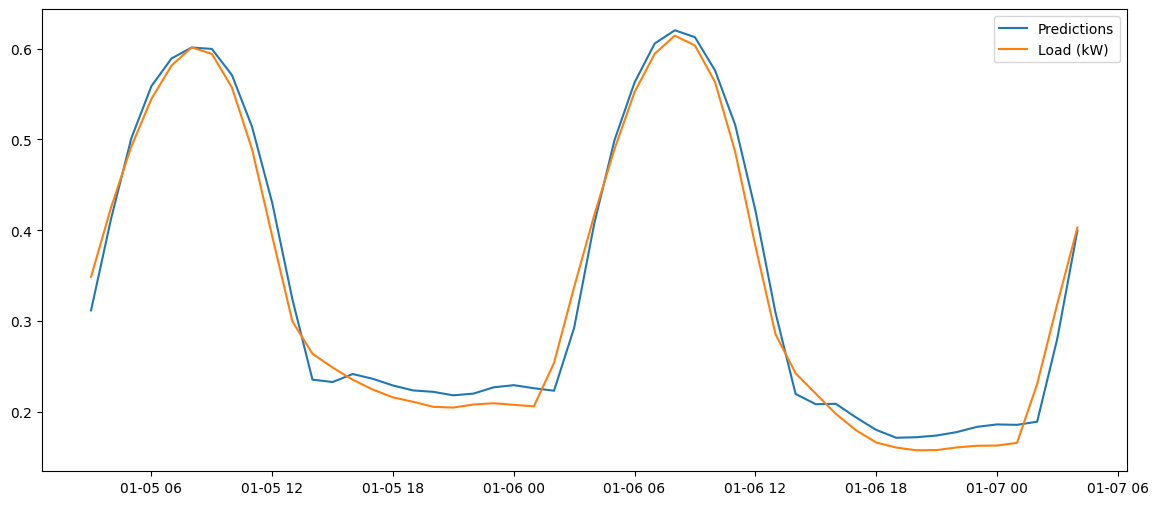

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.plot(train_results['Train Predictions'][50:100],label='Predictions')
plt.plot(train_results['Actuals'][50:100],label='Load (kW)')
plt.legend()

In [19]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,0.263477,0.251473
1,0.251846,0.240543
2,0.243839,0.231670
3,0.237862,0.222544
4,0.230326,0.213866
...,...,...
4995,0.311965,0.302027
4996,0.306456,0.297623
4997,0.303059,0.291795
4998,0.297434,0.287677


In [20]:
val_results.set_index(df_val.index,inplace=True)


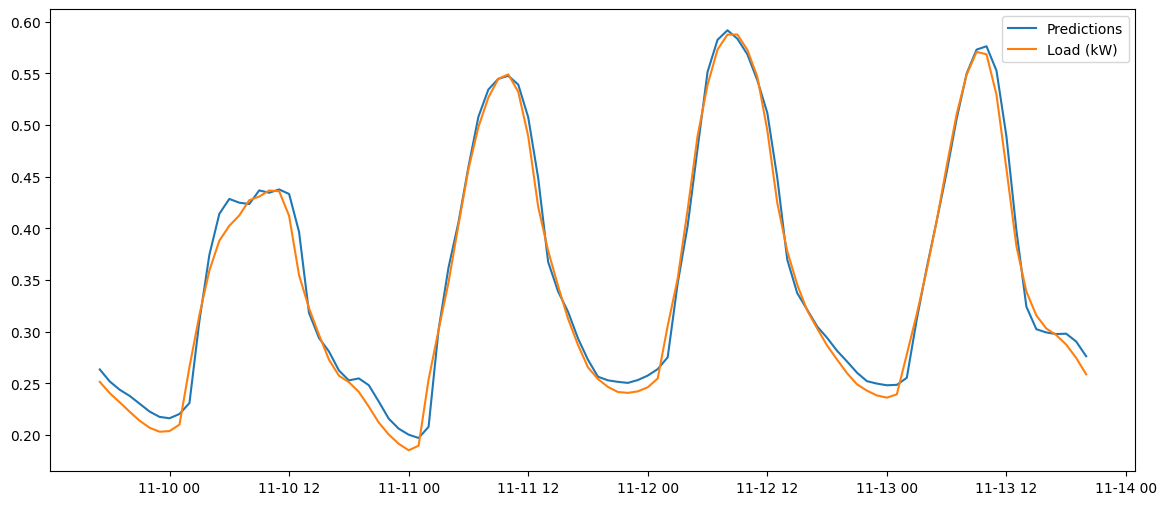

In [21]:

plt.figure(figsize=(14,6))
plt.plot(val_results['Val Predictions'][:100],label='Predictions')
plt.plot(val_results['Actuals'][:100],label='Load (kW)')
plt.legend()

In [22]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

564/564 [==============================] - 3s 5ms/step


,Test Predictions,Actuals
0,0.295339,0.297552
1,0.313267,0.344530
2,0.380640,0.380393
3,0.421280,0.417389
4,0.454285,0.454419
...,...,...
18038,0.346320,0.355208
18039,0.344751,0.343048
18040,0.337467,0.332423
18041,0.328795,0.323845


In [23]:
test_results.set_index(df_test.index,inplace=True)


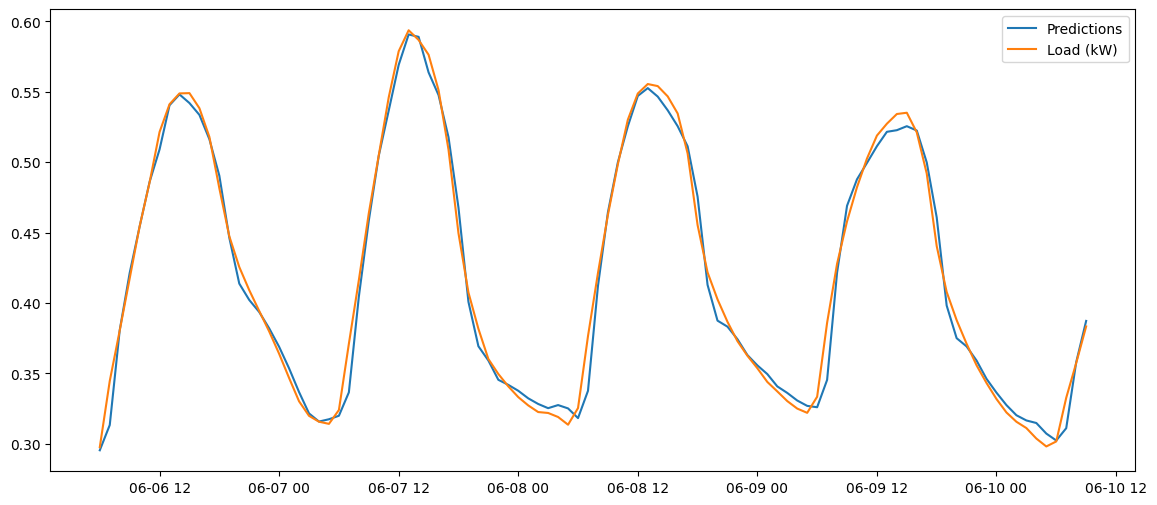

In [24]:
plt.figure(figsize=(14,6))

plt.plot(test_results['Test Predictions'][:100],label='Predictions')
plt.plot(test_results['Actuals'][:100],label='Load (kW)')
plt.legend()

In [25]:
# Calculate the absolute errors
errors = abs(test_predictions - y_test1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test1)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.01
Accuracy: 95.55 %.
